<a href="https://colab.research.google.com/github/kabilesh902/CVIP-Data-Science/blob/main/Exploratory_data_analysis_terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib-venn

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cc=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
cc.head()

<ipython-input-4-be2dc2df8efb>:1: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  cc=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
cc.shape

(9656, 135)

In [6]:
cc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(4), object(54)
memory usage: 9.9+ MB


In [7]:
cc.corr()

<ipython-input-7-198ba5fc0ade>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cc.corr()


,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999932,-0.039822,-0.015519,-0.035091,-0.268699,0.217144,-0.128277,0.219563,0.125161,...,0.047343,NaN,-0.090917,NaN,0.022888,-0.145849,0.040527,0.034432,-0.176655,-0.040629
iyear,0.999932,1.000000,-0.051454,-0.015840,-0.035104,-0.268817,0.216825,-0.128093,0.219302,0.125690,...,0.047938,NaN,-0.094060,NaN,0.022291,-0.145776,0.039914,0.033830,-0.177241,-0.041448
imonth,-0.039822,-0.051454,1.000000,0.001390,0.002593,0.021049,0.016670,-0.011123,0.012336,-0.050970,...,-0.049749,NaN,0.233792,NaN,0.046758,-0.001472,0.050663,0.049998,0.057428,0.071940
iday,-0.015519,-0.015840,0.001390,1.000000,0.002881,0.037563,0.013953,0.016124,0.014895,-0.014977,...,0.006536,NaN,0.024182,NaN,0.065805,-0.034497,0.007761,0.006379,0.035926,0.023261
extended,-0.035091,-0.035104,0.002593,0.002881,1.000000,-0.103517,-0.033539,-0.130661,-0.018505,0.062337,...,-0.054771,NaN,-0.135904,NaN,-0.195824,-0.014365,0.034774,0.046570,0.033739,0.029477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.145849,-0.145776,-0.001472,-0.034497,-0.014365,0.099853,0.139521,0.178974,0.199277,-0.066495,...,-0.011149,NaN,0.071487,NaN,-0.081259,1.000000,0.049449,0.053383,0.037972,0.030958
INT_LOG,0.040527,0.039914,0.050663,0.007761,0.034774,0.151941,0.014229,0.039664,-0.016431,0.048238,...,0.029208,NaN,-0.057419,NaN,-0.060987,0.049449,1.000000,0.993681,0.106332,0.751734
INT_IDEO,0.034432,0.033830,0.049998,0.006379,0.046570,0.137700,0.016003,0.029683,-0.015468,0.047358,...,0.024002,NaN,-0.051957,NaN,-0.078180,0.053383,0.993681,1.000000,0.135552,0.754933
INT_MISC,-0.176655,-0.177241,0.057428,0.035926,0.033739,0.400846,0.204809,0.202205,0.147682,-0.042840,...,-0.023137,NaN,0.017868,NaN,0.012022,0.037972,0.106332,0.135552,1.000000,0.425968


In [8]:
cc.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
cc.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Targeted','nkill':'No.of.Kill',
                       'nwound':'No.of.Wounded','gname':'Gang','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [10]:
cc=cc[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','No.of.Kill',
               'No.of.Wounded','Targeted','Gang','Target_type','Weapon_type','Motive']]

In [11]:

cc.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,No.of.Kill,No.of.Wounded,Targeted,Gang,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
# Calculate the number of missing values in each column
missing_counts = cc.isnull().sum()

# Print the result
print(missing_counts)


Year                0
Month               0
Day                 0
Country             1
state              39
Region              1
city                1
latitude          303
longitude         303
AttackType          1
No.of.Kill       1159
No.of.Wounded    2442
Targeted           74
Gang                1
Target_type         1
Weapon_type         1
Motive           9055
dtype: int64


In [17]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           9656 non-null   int64  
 1   Month          9656 non-null   int64  
 2   Day            9656 non-null   int64  
 3   Country        9655 non-null   object 
 4   state          9617 non-null   object 
 5   Region         9655 non-null   object 
 6   city           9655 non-null   object 
 7   latitude       9353 non-null   float64
 8   longitude      9353 non-null   float64
 9   AttackType     9655 non-null   object 
 10  No.of.Kill     8497 non-null   float64
 11  No.of.Wounded  7214 non-null   float64
 12  Targeted       9582 non-null   object 
 13  Gang           9655 non-null   object 
 14  Target_type    9655 non-null   object 
 15  Weapon_type    9655 non-null   object 
 16  Motive         601 non-null    object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.

In [18]:

#Printing the Most Attacked Country

print("Most Attacked Country:",cc["Country"].value_counts().idxmax())

Most Attacked Country: United Kingdom


In [21]:
#Printing the Most Attacked City
if not cc.empty and len(cc["city"].value_counts()) >= 1:
    most_attacked_city = cc["city"].value_counts().index[0]
    print("Most Attacked City:", most_attacked_city)
else:
    print("No data or insufficient data to determine the most attacked city.")


Most Attacked City: Belfast


In [22]:

# Printing the Most Attacked Region

print("Most Attacked Region:",cc["Region"].value_counts().idxmax())

Most Attacked Region: Western Europe


In [23]:
#Printing the  Most Attacked Gang

print("Most Attacked Gang:",cc['Gang'].value_counts().index[1])

Most Attacked Gang: Irish Republican Army (IRA)


In [24]:


killData = cc.loc[:,'No.of.Kill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values


Number of people killed by terror attack: 6929


In [25]:
countryData = cc.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [26]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='No.of.Kill', aggfunc='sum')
countryKillFormatData


Country,Afghanistan,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Barbados,...,United Kingdom,United States,Uruguay,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia
No.of.Kill,53.0,0.0,0.0,19.0,328.0,3.0,9.0,0.0,0.0,73.0,...,1746.0,179.0,4.0,2.0,11.0,44.0,0.0,2.0,1.0,5.0


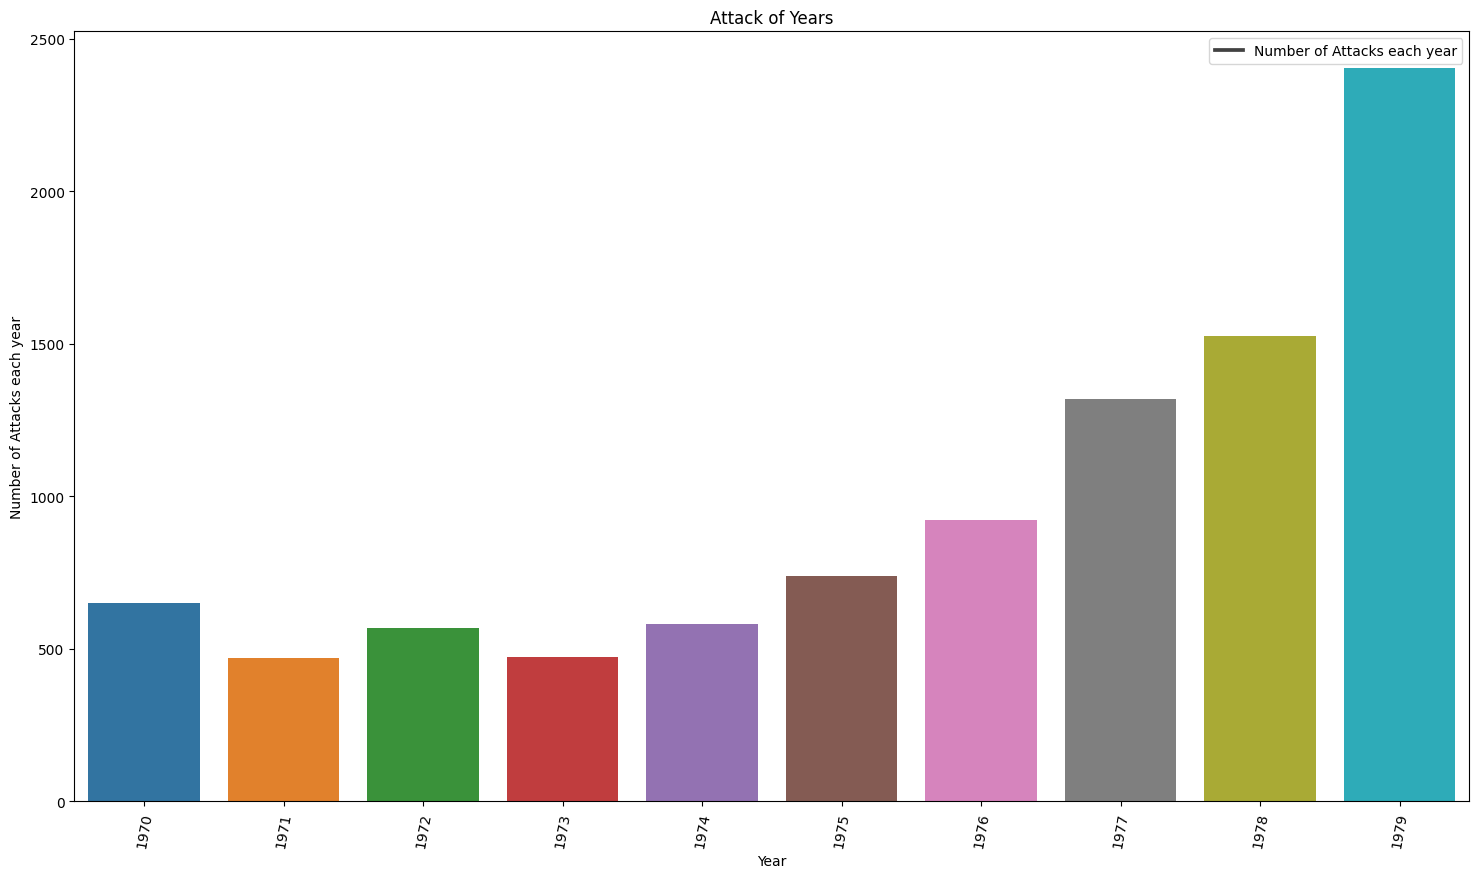

In [27]:
# Count the number of attacks for each year and sort by year
m = cc['Year'].value_counts(dropna=False).sort_index()

# Get the unique years
n = cc['Year'].unique()

# Create a figure for the plot
plt.figure(figsize=(18, 10))

# Create a bar plot using Seaborn
sns.barplot(x=n, y=m)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=80)

# Set the label for the y-axis
plt.ylabel('Number of Attacks each year')

# Add a legend
plt.legend(labels=['Number of Attacks each year'])

# Set the label for the x-axis
plt.xlabel('Year')

# Set the title of the plot
plt.title('Attack of Years')

# Display the plot
plt.show()

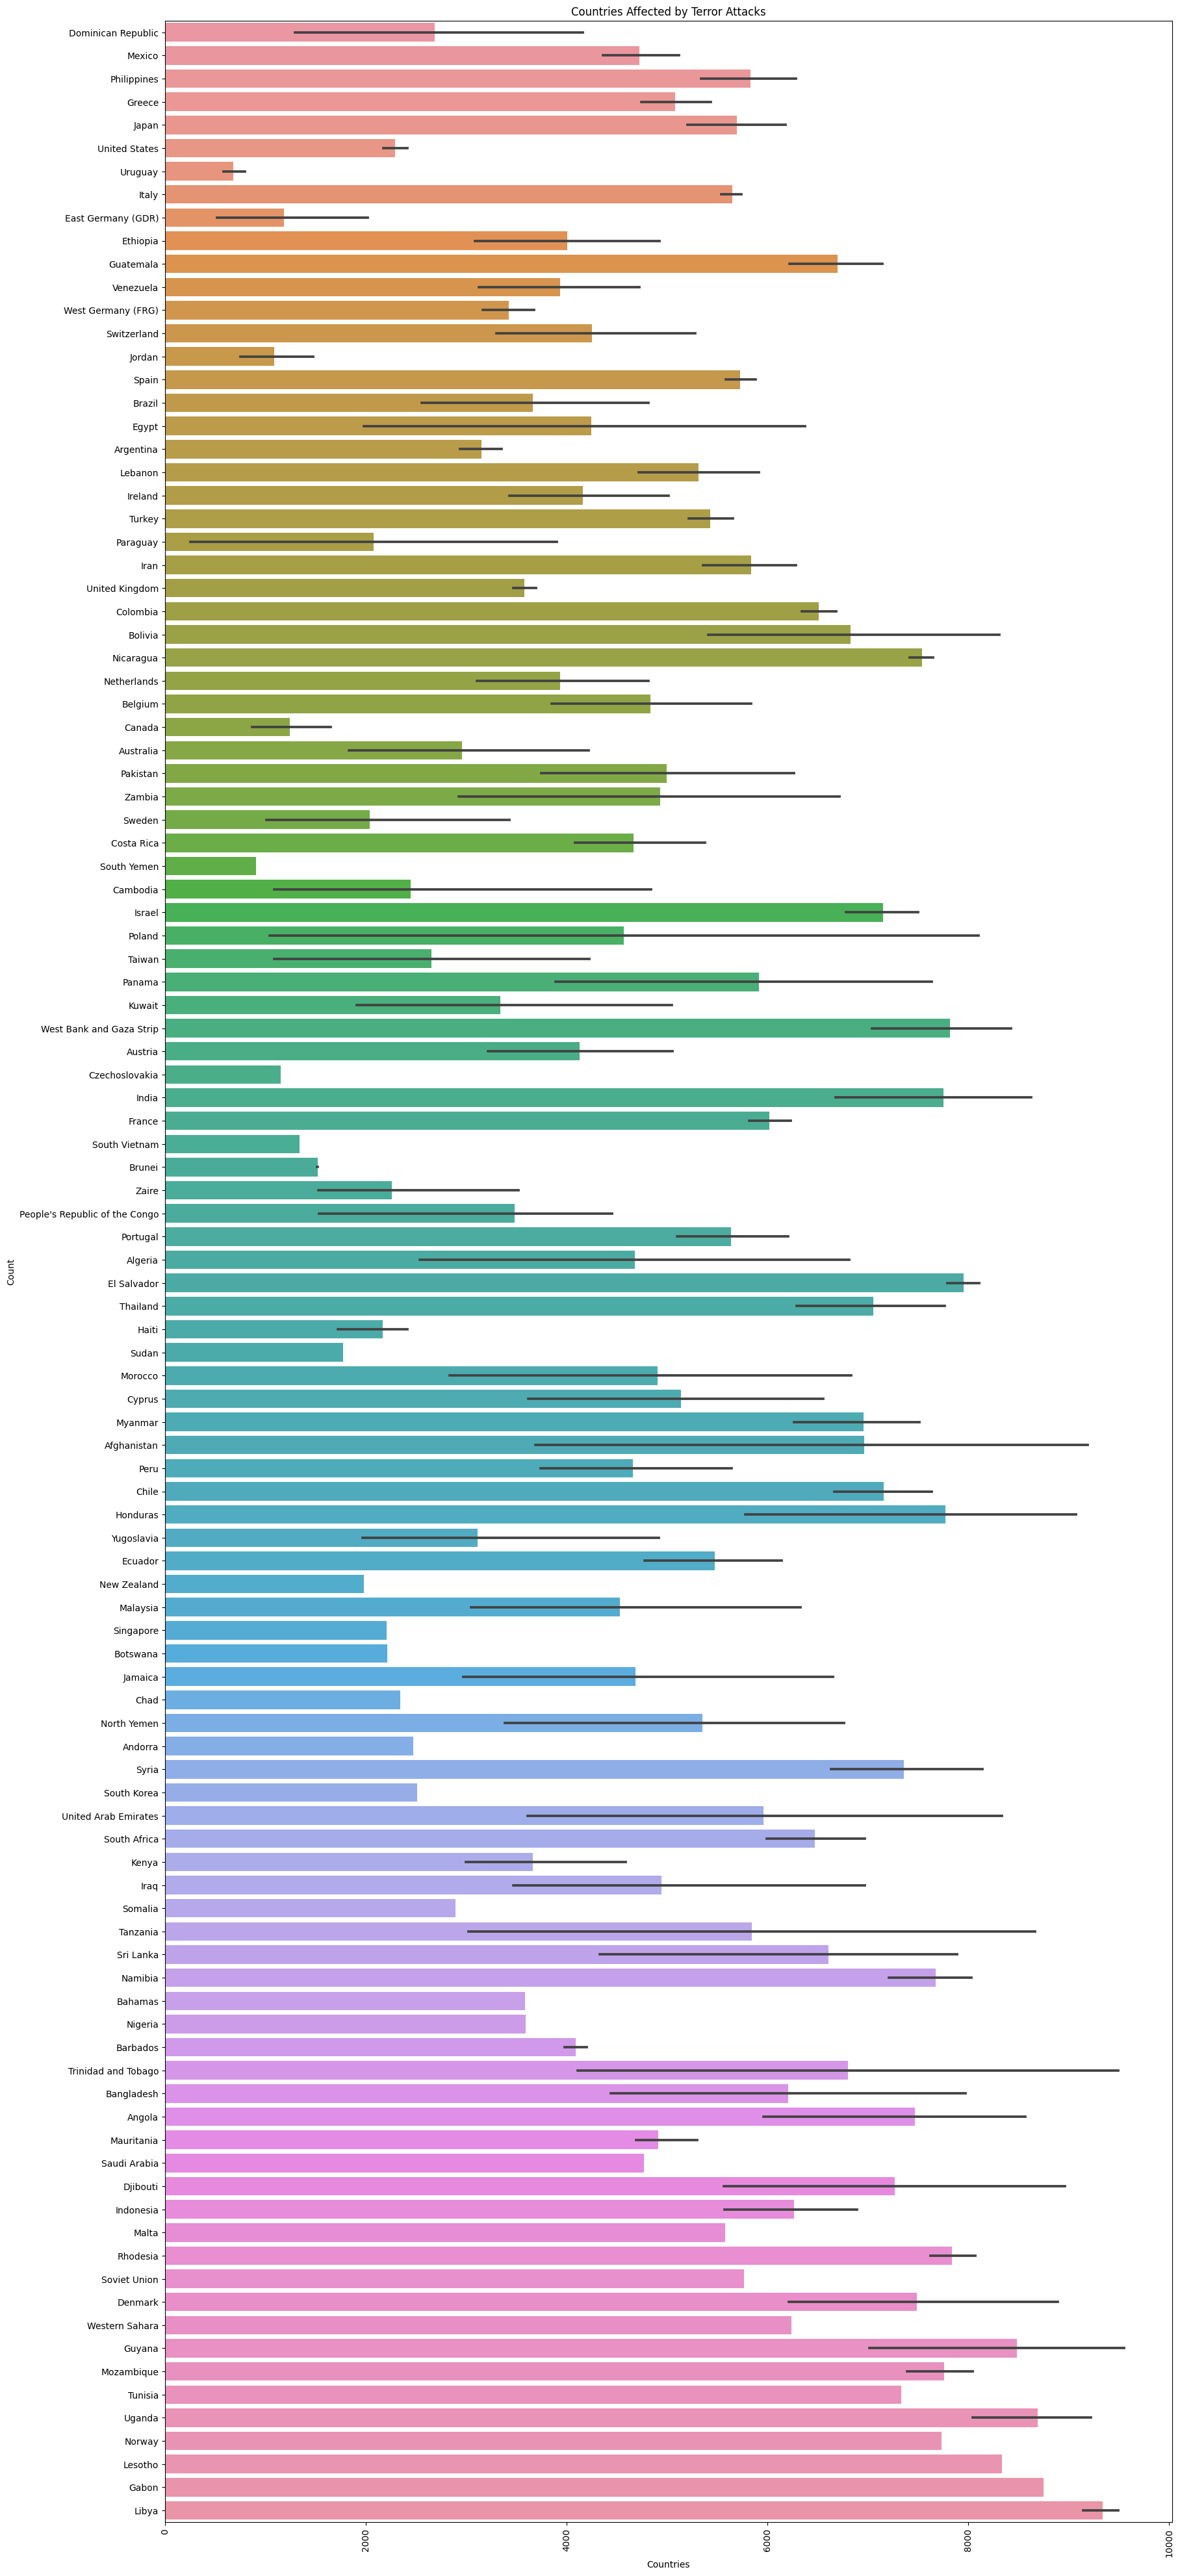

In [28]:

# Create a subplot with a specific figure size
plt.subplots(figsize=(20, 50))

# Create a bar plot using Seaborn
# cc['Country'].index refers to the index (x-axis) of the DataFrame
# cc['Country'].values refers to the values (y-axis) of the DataFrame
sns.barplot(x=cc['Country'].index, y=cc['Country'].values)

# Set the title of the plot
plt.title('Countries Affected by Terror Attacks')

# Set the label for the y-axis
plt.ylabel('Count')

# Set the label for the x-axis
plt.xlabel('Countries')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


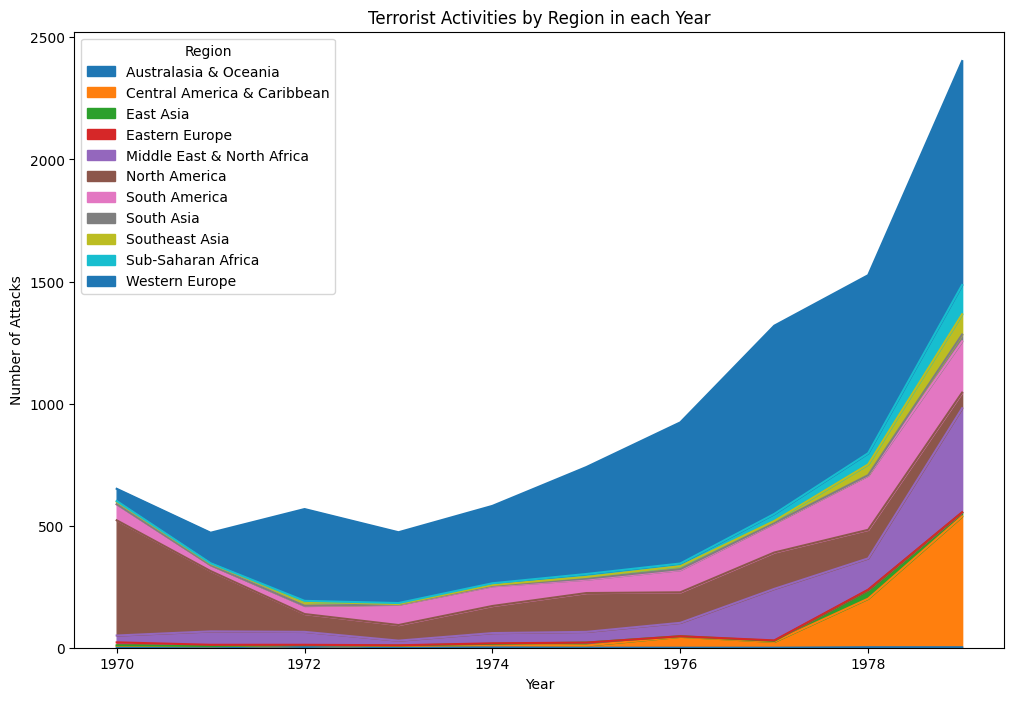

In [29]:
pd.crosstab(cc.Year, cc.Region).plot(kind="area",figsize=(12,8))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [30]:
cc.Country.value_counts()[:10]


United Kingdom    1599
United States     1460
Italy              992
Spain              890
Turkey             475
France             464
Colombia           404
El Salvador        387
Argentina          326
Nicaragua          286
Name: Country, dtype: int64

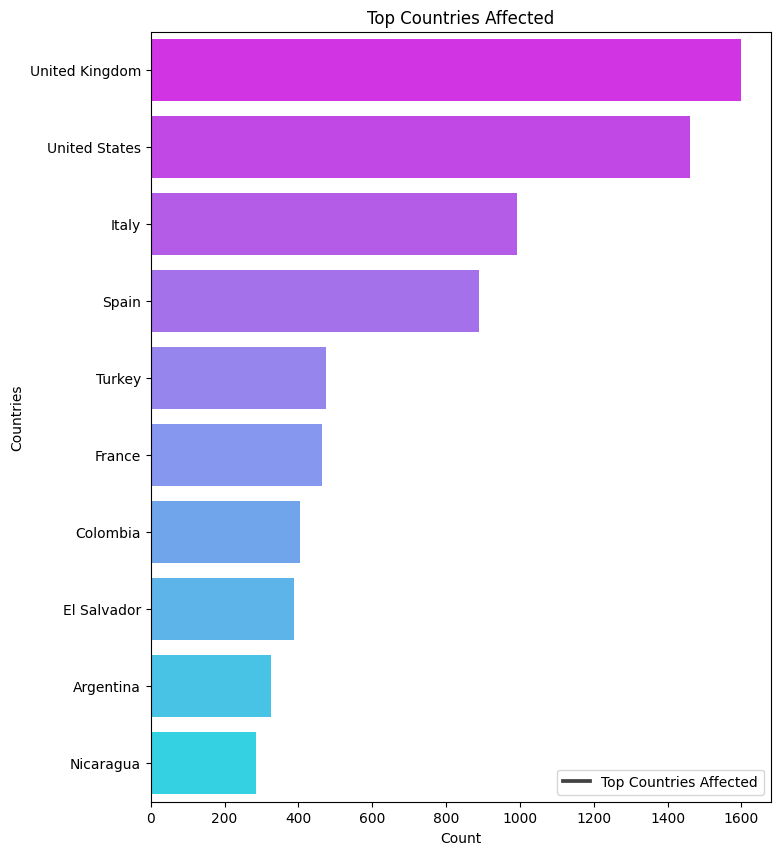

In [31]:
# Create a subplot with a specific figure size
plt.subplots(figsize=(8, 10))

# Calculate the top 10 affected countries and their counts
top_countries = cc['Country'].value_counts()[:10]

# Create a bar plot using Seaborn
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool_r')

# Set the title of the plot
plt.title('Top Countries Affected')

# Set the label for the x-axis
plt.xlabel('Count')

# Set the label for the y-axis
plt.ylabel('Countries')

# Add a legend
plt.legend(labels=['Top Countries Affected'])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [32]:
cc.Gang.value_counts()[1:5]

Irish Republican Army (IRA)                    983
Basque Fatherland and Freedom (ETA)            424
Protestant extremists                          197
Sandinista National Liberation Front (FSLN)    197
Name: Gang, dtype: int64

In [34]:
GangMost1 = cc[cc.Gang.isin(['Irish Republican Army (IRA)'])]
GangMost1.Country.unique()

array(['United Kingdom', 'Ireland', 'United States', 'Zaire', 'Portugal',
       'West Germany (FRG)', 'Belgium', 'Netherlands'], dtype=object)

In [35]:
GangMost1.Region.unique()

GangMost1.city.unique()

array(['Londonderry', 'Belfast', 'Crossmaglen', 'Trillick', 'Clady',
       'Kinawley', 'Unknown', 'Edendork', 'Strabane', 'Lambeg', 'Lurgan',
       'Newry', 'Caledon', 'Ballymurphy, Belfast', 'Newtownabbey',
       'Keady', 'Castlewellan', 'Dublin', 'Stewartstown', 'Cullyhanna',
       'Newtownbutler', 'Moira', 'Aldershot', 'Frevagh', 'Middletown',
       'Coalisland', 'Ballykelly', 'Andersontown, Belfast', 'Ballymoney',
       'Newtownhamilton', 'Carrickfergus', 'Rosslea', 'Craigavon',
       'Dungiven', 'Silverbridge', 'Claudy', 'Lisnaskea', 'Enniskillen',
       'Creggan', 'Dungannon', 'Derry', 'Aghalane', 'Armagh', 'Derrydoon',
       'Ballynahone', 'Belleek', 'Killeter', 'Feeny', 'Cappagh',
       'Strangford', 'Forkhill', 'London', 'Ballygawley', 'Aughnacloy',
       'Portadown', 'Omagh', 'Cullaville', 'Clogher', 'Coleraine',
       'Meigh', 'Newcastle', 'Castlederg', 'Washington', 'Tullyhommon',
       'Belcoo', 'Kinshasa', 'Lisbon', 'Birmingham', 'Lifford',
       'Ballyronan

In [36]:
GangMost2 = cc[cc.Gang.isin(['Basque Fatherland and Freedom (ETA)'])]
GangMost2.Country.unique()

array(['Spain', 'France'], dtype=object)

In [37]:
GangMost2.Region.unique()

array(['Western Europe'], dtype=object)

In [38]:
GangMost2.city.unique()


array(['Donostia-San Sebastian', 'Eibar', 'Urnieta', 'Abadiano',
       'Urguizo', 'Isasondo', 'Galdacano', 'Pamplona', 'Madrid',
       'Azpeitia', 'Bilbao', 'Beasain', 'Ataun', 'Arrasate', 'Lugo',
       'Legazpi', 'Aia', 'Zarauz', 'Orio', 'Valladolid', 'Guernica',
       'Unknown', 'Barcelona', 'Vigo', 'Deba', 'Usurbil', 'Hernani',
       'Vitoria', 'Villabona', 'Paris', 'Onate', 'Villarreal de Alava',
       'Berriz', 'Villafranca de Ordizia', 'Cizurquil', 'Lezo',
       'Guetaria', 'Hendaye', 'Basauri', 'Gerona', 'Llodio', 'Amorebieta',
       'Santurce', 'Tolosa', 'Algorta', 'Urizar de Lemoniz', 'Tudela',
       'Errenteria', 'Barrica', 'Sopelana', 'Zumarraga', 'Azcoitia',
       'Marquina', 'Lasarte', 'San Rafael', 'Las Arenas', 'Pasajes',
       'Gallarta', 'Ondarroa', 'Villajimena', 'Herrera', 'Barakaldo',
       'Eguia', 'Deva', 'Aduna', 'Portugalete', 'San Sebastian', 'Sestao',
       'Mungia', 'Durango', 'Pasajes de San Pedro', 'Irun', 'Cestona',
       'Fuenterrabia', 'Lem

In [39]:
GangMost3 = cc[cc.Gang.isin(['Shining Path (SL)'])]


In [40]:
GangMost3.Country.unique()

array(['Peru'], dtype=object)

In [41]:
GangMost3.Region.unique()

array(['South America'], dtype=object)

In [42]:
GangMost3.city.unique()

array(['Ayacucho', 'Uchuraccay'], dtype=object)

In [43]:
attackData = cc.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [44]:

attacktypeKill = typeKillData.pivot_table(columns='AttackType', values='No.of.Kill', aggfunc='sum')
attacktypeKill


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
No.of.Kill,1519.0,1923.0,2083.0,495.0,175.0,196.0,181.0,11.0,346.0


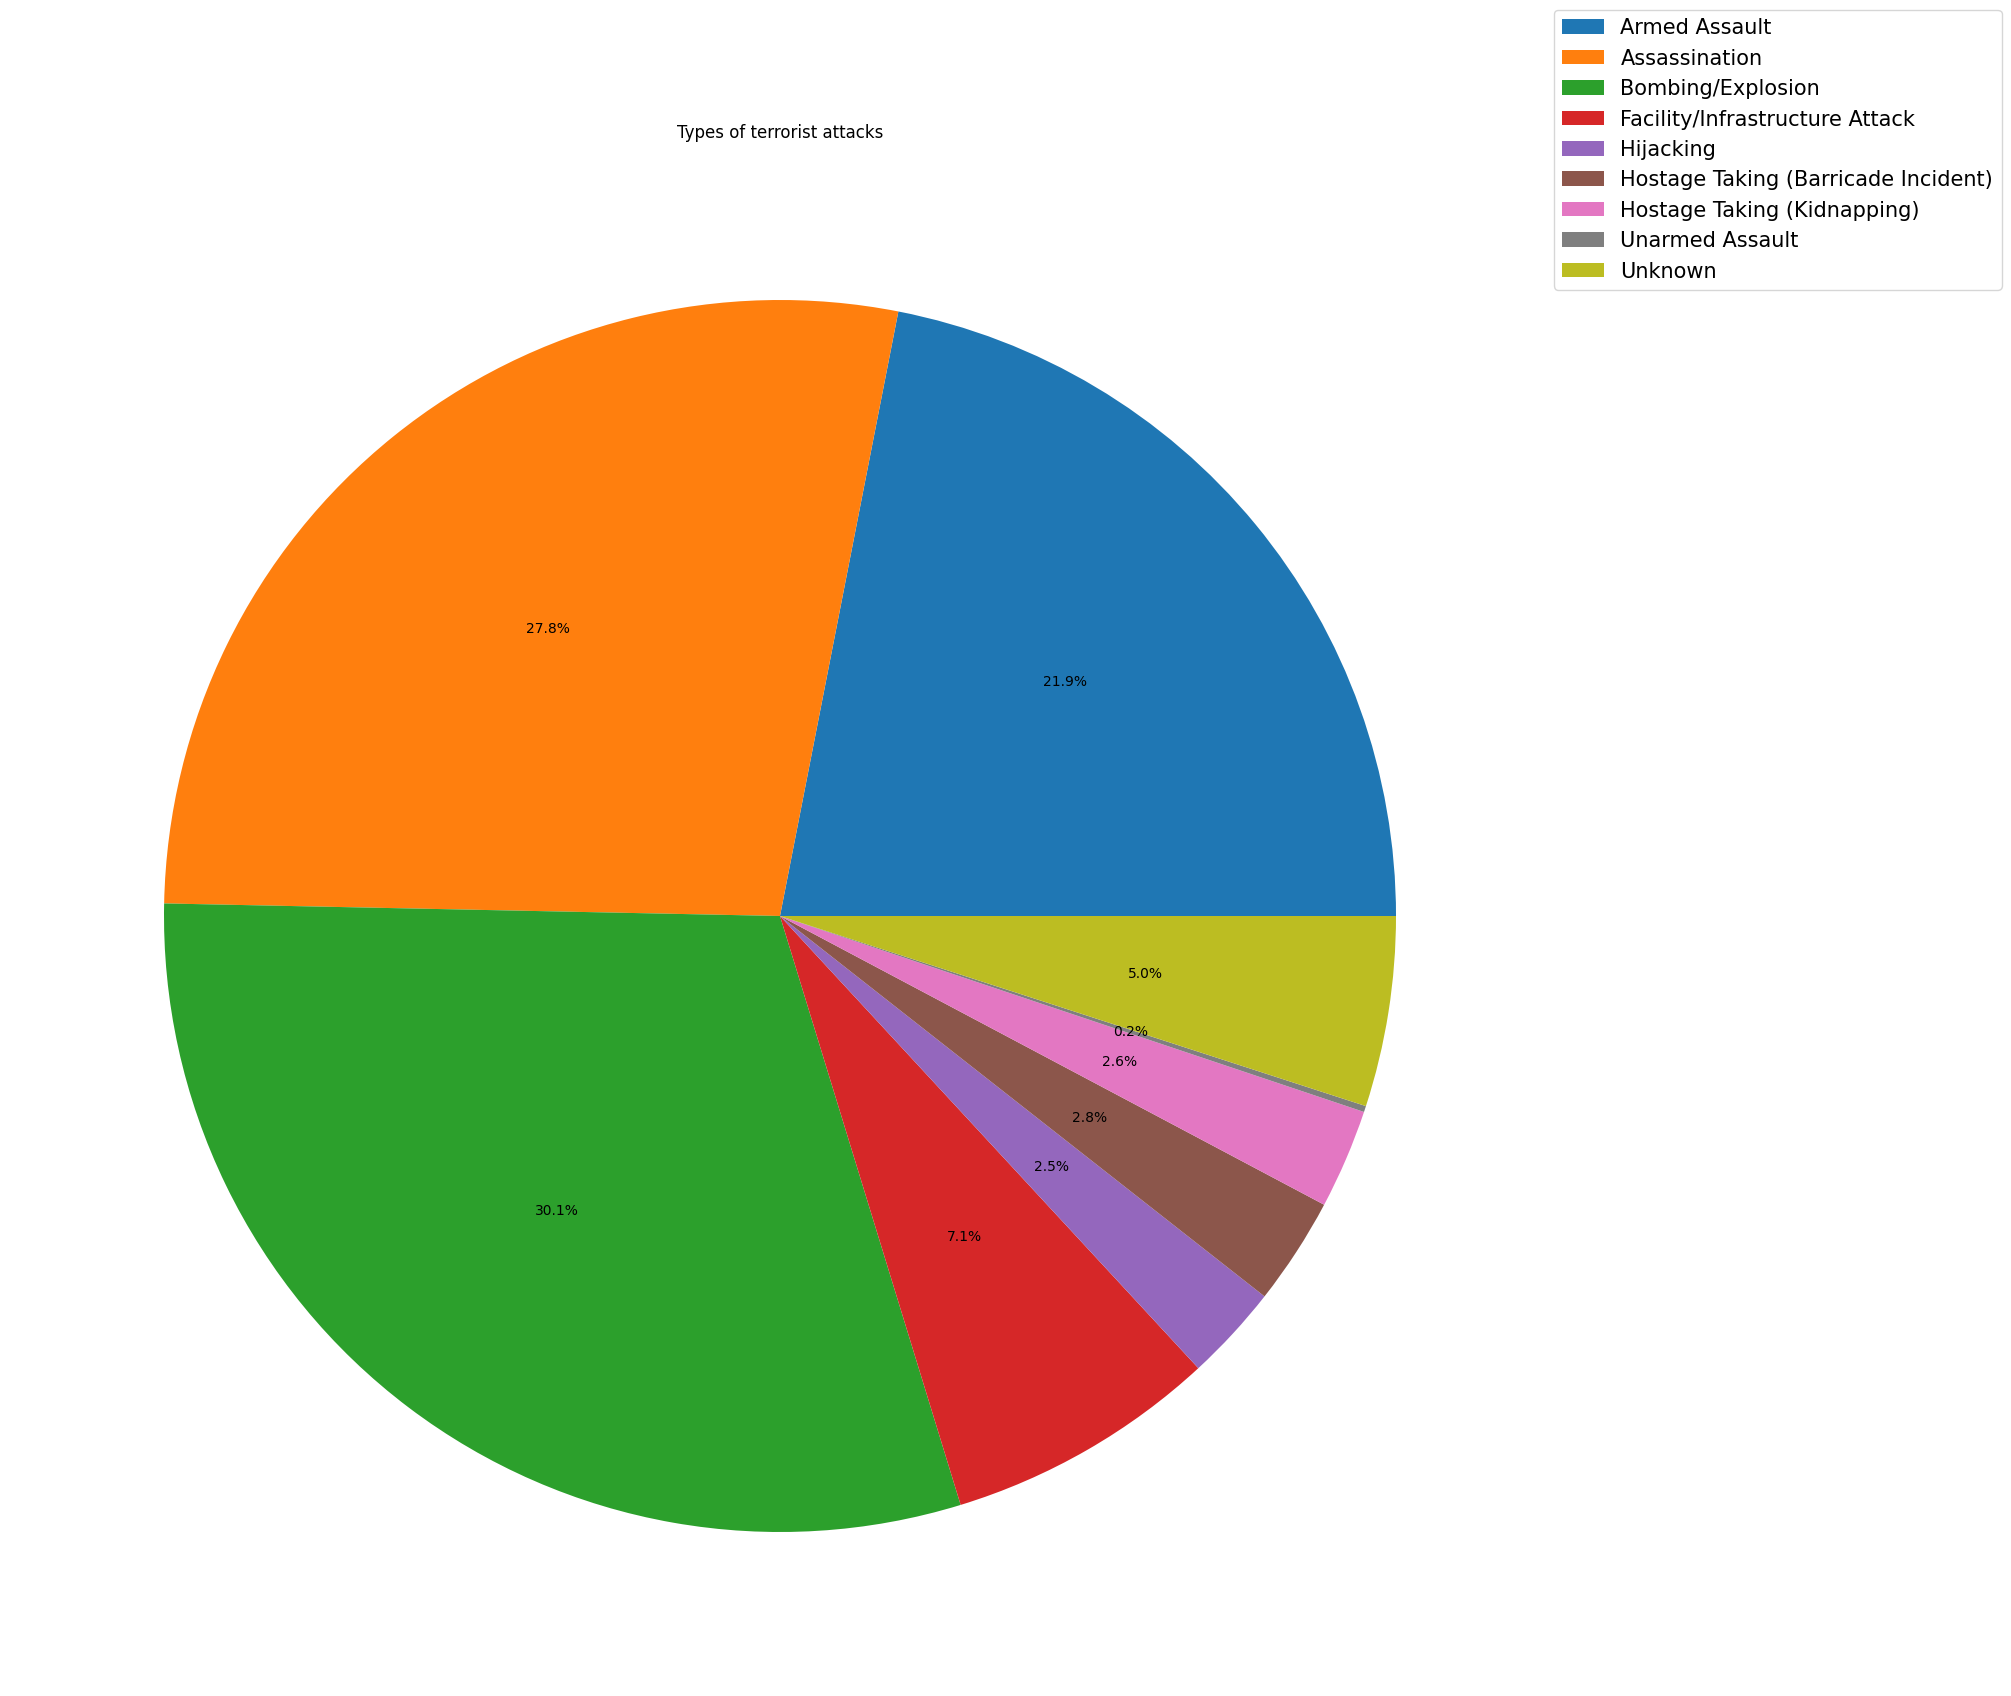

In [45]:
# Assuming attacktypeKill and labels are defined

# Convert the DataFrame columns to a list
labels = attacktypeKill.columns.tolist()

# Transpose the DataFrame
transposed = attacktypeKill.T

# Convert the transposed DataFrame values to a 1D list
values = transposed.values.flatten()

# Create the pie chart
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=360, autopct='%.1f%%')

# Set the title of the plot
plt.title('Types of terrorist attacks')

# Create a legend with labels and adjust its position
plt.legend(labels, loc='lower right', bbox_to_anchor=(1.3, 0.9), fontsize=15)

# Display the plot
plt.show()